# **Prediction of cost of living of different cities in UK**

### **1) Importing Library**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import os

### **2) Loading Data (i.e Data Collection and Data Pre-Processing)**

In [38]:
# Read the data into a pandas dataframe

data = pd.read_excel("cities.xlsx")

In [39]:
data

,No.,Year,City,Country,Inexpensive Restaurant,Mid-Range Restaurant,High-Range Restaurant,Domestic Beer (0.5 liter draught),Imported Beer (0.33 liter),Pepsi (0.33 liter bottle),...,Mortgage Interest Rate (20 Years Fixed-Rate) in Percentages,Electricity,Internet,Fitness Club (in Month) (per person),Tennis Court Rent (in Week) (per hours),Cinema (per person),Pair of Jeans,Summer Dress,Pair of Sport Shoes,Pair of Leather Shoes
0,1,2018,Aberdeen,United Kingdom,0.0,0.0,5.35,0.0,3.30,0.00,...,3.80,168.07,29.00,34.99,7.2,9.50,60.0,31.00,62.22,78.00
1,2,2019,Aberdeen,United Kingdom,13.0,50.0,5.35,3.3,3.50,1.32,...,0.00,100.16,37.17,36.43,7.2,9.00,70.0,32.00,75.83,61.00
2,3,2020,Aberdeen,United Kingdom,0.0,0.0,5.35,0.0,3.30,0.00,...,3.50,103.36,26.17,40.83,7.2,0.00,63.0,26.25,46.25,57.00
3,4,2021,Aberdeen,United Kingdom,12.5,40.0,5.00,3.0,3.25,1.29,...,0.00,62.50,21.17,26.35,7.2,6.00,0.0,0.00,0.00,0.00
4,5,2022,Aberdeen,United Kingdom,15.0,70.0,5.35,4.0,3.30,1.17,...,3.38,163.86,28.93,37.83,7.2,7.75,48.0,0.00,63.33,90.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,182,2019,Swansea,United Kingdom,17.0,50.0,7.79,4.0,4.20,1.21,...,5.90,155.62,11.25,21.25,15.0,6.50,58.8,25.00,76.25,63.75
182,183,2020,Swansea,United Kingdom,17.0,50.0,7.79,4.0,4.20,1.52,...,5.90,155.62,11.25,22.84,15.0,6.50,58.8,25.00,76.25,63.75
183,184,2021,Swansea,United Kingdom,17.0,50.0,7.79,4.0,4.20,1.52,...,5.90,155.62,11.25,22.84,15.0,6.50,58.8,25.00,76.25,63.75
184,185,2022,Swansea,United Kingdom,17.0,50.0,7.79,4.0,4.20,1.52,...,5.90,155.62,11.25,22.84,15.0,6.50,58.8,25.00,76.25,63.75


In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Data columns (total 51 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   No.                                                          186 non-null    int64  
 1   Year                                                         186 non-null    int64  
 2   City                                                         186 non-null    object 
 3   Country                                                      186 non-null    object 
 4   Inexpensive Restaurant                                       186 non-null    float64
 5   Mid-Range Restaurant                                         186 non-null    float64
 6   High-Range Restaurant                                        186 non-null    float64
 7   Domestic Beer (0.5 liter draught)                            186 non-null    flo

### **3) Feature Selection**

In [41]:
data.drop("No.", axis=1, inplace=True)
data.drop("Country", axis=1, inplace=True)
data.drop("Mortgage Interest Rate (20 Years Fixed-Rate) in Percentages", axis=1, inplace=True)
data.drop("Buy Apartment (per square meter) in City Centre", axis=1, inplace=True)
data.drop("Buy Apartment (per square meter) in Outside of Centre", axis=1, inplace=True)
data

,Year,City,Inexpensive Restaurant,Mid-Range Restaurant,High-Range Restaurant,Domestic Beer (0.5 liter draught),Imported Beer (0.33 liter),Pepsi (0.33 liter bottle),Water (0.33 litre),Cappuccino(regular),...,Monthly Pass (Regular Price),Electricity,Internet,Fitness Club (in Month) (per person),Tennis Court Rent (in Week) (per hours),Cinema (per person),Pair of Jeans,Summer Dress,Pair of Sport Shoes,Pair of Leather Shoes
0,2018,Aberdeen,0.0,0.0,5.35,0.0,3.30,0.00,0.00,0.00,...,60.50,168.07,29.00,34.99,7.2,9.50,60.0,31.00,62.22,78.00
1,2019,Aberdeen,13.0,50.0,5.35,3.3,3.50,1.32,1.12,2.58,...,75.27,100.16,37.17,36.43,7.2,9.00,70.0,32.00,75.83,61.00
2,2020,Aberdeen,0.0,0.0,5.35,0.0,3.30,0.00,0.00,2.65,...,75.27,103.36,26.17,40.83,7.2,0.00,63.0,26.25,46.25,57.00
3,2021,Aberdeen,12.5,40.0,5.00,3.0,3.25,1.29,1.05,2.57,...,75.27,62.50,21.17,26.35,7.2,6.00,0.0,0.00,0.00,0.00
4,2022,Aberdeen,15.0,70.0,5.35,4.0,3.30,1.17,1.06,3.08,...,75.27,163.86,28.93,37.83,7.2,7.75,48.0,0.00,63.33,90.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,2019,Swansea,17.0,50.0,7.79,4.0,4.20,1.21,1.05,3.11,...,72.00,155.62,11.25,21.25,15.0,6.50,58.8,25.00,76.25,63.75
182,2020,Swansea,17.0,50.0,7.79,4.0,4.20,1.52,1.05,3.11,...,72.00,155.62,11.25,22.84,15.0,6.50,58.8,25.00,76.25,63.75
183,2021,Swansea,17.0,50.0,7.79,4.0,4.20,1.52,1.05,3.11,...,72.00,155.62,11.25,22.84,15.0,6.50,58.8,25.00,76.25,63.75
184,2022,Swansea,17.0,50.0,7.79,4.0,4.20,1.52,1.05,3.11,...,72.00,155.62,11.25,22.84,15.0,6.50,58.8,25.00,76.25,63.75


In [42]:
data.describe()

,Year,Inexpensive Restaurant,Mid-Range Restaurant,High-Range Restaurant,Domestic Beer (0.5 liter draught),Imported Beer (0.33 liter),Pepsi (0.33 liter bottle),Water (0.33 litre),Cappuccino(regular),Milk (1 liter),...,Monthly Pass (Regular Price),Electricity,Internet,Fitness Club (in Month) (per person),Tennis Court Rent (in Week) (per hours),Cinema (per person),Pair of Jeans,Summer Dress,Pair of Sport Shoes,Pair of Leather Shoes
count,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,...,186.000000,186.00000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000
mean,2020.500000,12.891183,50.097742,5.796935,3.837796,3.849140,1.392849,1.014516,2.643925,1.975484,...,62.701828,159.38957,27.273763,27.058871,10.735323,8.589892,54.150860,28.567419,58.280645,61.101559
std,1.712435,3.785360,14.295397,1.529638,1.129697,1.053951,0.448968,0.317861,0.855563,1.414137,...,22.315688,65.37985,9.857257,9.565907,3.355401,3.209359,20.285364,10.167461,22.232451,22.723983
min,2018.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2019.000000,11.615000,45.000000,5.500000,3.580000,3.500000,1.270000,0.902500,2.640000,0.920000,...,55.550000,131.80000,26.800000,24.170000,8.320000,8.000000,52.130000,26.880000,57.035000,54.512500
50%,2020.500000,13.000000,50.000000,6.000000,4.000000,4.000000,1.445000,1.060000,2.860000,1.095000,...,61.205000,164.33000,29.530000,27.365000,10.710000,9.380000,59.000000,30.000000,63.255000,62.135000
75%,2022.000000,15.000000,60.000000,6.500000,4.475000,4.350000,1.657500,1.172500,3.080000,3.560000,...,66.000000,205.97000,31.822500,31.570000,13.500000,10.112500,64.967500,33.127500,70.830000,75.750000
max,2023.000000,22.000000,80.000000,8.000000,6.000000,5.200000,3.230000,1.590000,4.000000,4.880000,...,160.870000,305.06000,49.330000,51.490000,16.670000,14.000000,89.000000,47.670000,86.670000,114.700000


### **4) Model Selection**

In [7]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, r2_score, f1_score
import pandas as pd

### **5) Model Training and Testing**

In [8]:
# Extract features and targets

features = data.drop(columns=['Year', 'City'])
year_target = data['Year']
city_target = data['City']

# Split data into training and testing sets

X_train, X_test, year_train, year_test, city_train, city_test = train_test_split(
    features, year_target, city_target, test_size=0.2, random_state=42
)

# Train regression model for year prediction
regressor = DecisionTreeRegressor()
regressor.fit(X_train, year_train)

# Train classification model for city prediction
classifier = RandomForestClassifier()
classifier.fit(X_train, city_train)

# Make predictions
predicted_years = regressor.predict(X_test)
predicted_cities = classifier.predict(X_test)

# Print predicted years and cities
for i in range(len(X_test)):
    #print("Features:", X_test.iloc[i])
    print("Predicted Year:", predicted_years[i])
    print("Predicted City:", predicted_cities[i])
    print("-------------------------------")


Predicted Year: 2023.0
Predicted City: London
-------------------------------
Predicted Year: 2018.0
Predicted City: Reading
-------------------------------
Predicted Year: 2018.0
Predicted City: Sheffield
-------------------------------
Predicted Year: 2023.0
Predicted City: Leicester
-------------------------------
Predicted Year: 2022.0
Predicted City: Leicester
-------------------------------
Predicted Year: 2019.0
Predicted City: Birmingham
-------------------------------
Predicted Year: 2021.0
Predicted City: Southampton
-------------------------------
Predicted Year: 2023.0
Predicted City: Brighton
-------------------------------
Predicted Year: 2023.0
Predicted City: Oxford
-------------------------------
Predicted Year: 2020.0
Predicted City: Plymouth
-------------------------------
Predicted Year: 2019.0
Predicted City: Brighton
-------------------------------
Predicted Year: 2022.0
Predicted City: Glasgow
-------------------------------
Predicted Year: 2020.0
Predicted City:

In [9]:
# Calculate accuracy for city prediction
accuracy_city = accuracy_score(city_test, predicted_cities)
print("Random Forest Classifier Accuracy:", accuracy_city)

# Calculate F1 score for city prediction
f1_city = f1_score(city_test, predicted_cities, average='weighted')
print("Random Forest Classifier F1 Score:", f1_city)

# Calculate Mean Absolute Error for year prediction
mae_rf = mean_absolute_error(year_test, predicted_years)
print("Decision Tree Regression MAE:", mae_rf)

# Calculate Mean Squared Error for year prediction
mse_rf = mean_squared_error(year_test, predicted_years)
print("Decision Tree Regression MSE:", mse_rf)

# Calculate R-squared score for year prediction
r2_rf = r2_score(year_test, predicted_years)
print("Decision Tree Regression R2 Score:", r2_rf)


Random Forest Classifier Accuracy: 0.868421052631579
Random Forest Classifier F1 Score: 0.8578947368421052
Decision Tree Regression MAE: 0.6578947368421053
Decision Tree Regression MSE: 1.236842105263158
Decision Tree Regression R2 Score: 0.5504656430908632


### **6) Model Evalution**

In [10]:
from sklearn.metrics import classification_report
print('\nEvaluation parameters for years : \n\n',classification_report(year_test, predicted_years))


Evaluation parameters for years : 

               precision    recall  f1-score   support

        2018       0.33      0.50      0.40         6
        2019       0.00      0.00      0.00         4
        2020       0.33      0.33      0.33         6
        2021       0.62      0.50      0.56        10
        2022       1.00      1.00      1.00         5
        2023       1.00      1.00      1.00         7

    accuracy                           0.58        38
   macro avg       0.55      0.56      0.55        38
weighted avg       0.59      0.58      0.58        38



In [11]:
from sklearn.metrics import classification_report
print('\nEvaluation parameters for cities : \n\n',classification_report(city_test, predicted_cities))


Evaluation parameters for cities : 

                      precision    recall  f1-score   support

            Belfast       1.00      1.00      1.00         1
         Birmingham       1.00      1.00      1.00         2
        Bournemouth       1.00      1.00      1.00         2
           Brighton       0.67      1.00      0.80         2
            Bristol       1.00      0.50      0.67         2
            Cardiff       1.00      1.00      1.00         2
             Exeter       1.00      1.00      1.00         3
            Glasgow       1.00      0.50      0.67         2
              Leeds       0.00      0.00      0.00         0
          Leicester       1.00      1.00      1.00         2
          Liverpool       0.00      0.00      0.00         0
             London       1.00      1.00      1.00         2
         Manchester       0.00      0.00      0.00         3
      Milton Keynes       0.50      1.00      0.67         1
Newcastle upon Tyne       1.00      1.00     

/Users/absar/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/absar/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/absar/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/absar/opt/anaconda3/

## 7) Data Visualization

### precidction of cities using year

In [43]:
city = []
for x in data.columns:
        city.append(x)
city.remove("City")

year = []
for x in data.columns:
        year.append(x)
year.remove("Year")

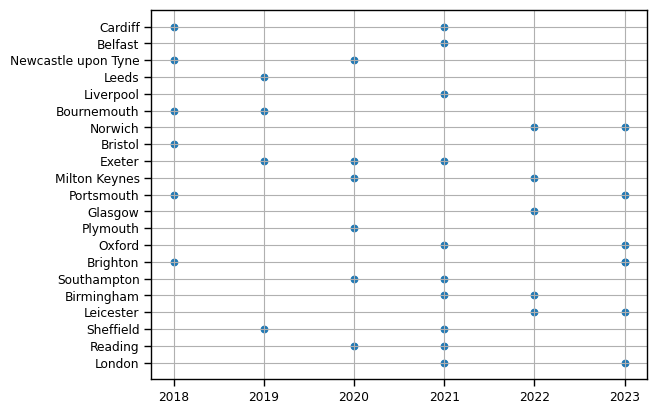

In [20]:
x = year_test
y = predicted_cities
plt.scatter(x,y)
plt.grid()
plt.show()

In [44]:
city

['Year',
 'Inexpensive Restaurant',
 'Mid-Range Restaurant',
 'High-Range Restaurant',
 'Domestic Beer (0.5 liter draught)',
 'Imported Beer (0.33 liter)',
 'Pepsi (0.33 liter bottle)',
 'Water (0.33 litre)',
 'Cappuccino(regular)',
 'Milk (1 liter)',
 'White Bread (500g)',
 'Eggs (12 regular)',
 'Water (1.5 litre)',
 'Domestic Beer (0.5 liter)',
 'Imported Beer (0.33 liter).1',
 'Apples (1kg)',
 'Oranges (1kg)',
 'Potato (1kg)',
 'Lettuce (1kg)',
 'White Rice (1kg)',
 'Tomato (1kg)',
 'Banana (1kg)',
 'Onion (1kg)',
 'Local Cheese (1kg)',
 'Bottle of Wine (Mid-Range)',
 'Cigarettes 20 Pack (Marlboro)',
 'Chicken Fillets (1kg)',
 'Beef Round (1kg)',
 'Apartment (1 bedroom) in City Centre',
 'Apartment (1 bedroom) Outside of Centre',
 'Apartment (3 bedroom) in City Centre',
 'Apartment (3 bedroom) Outside of Centre',
 'Average Monthly Net Salary (After Tax)',
 'One-way Ticket (Local Transport)',
 'Gasoline (1 liter)',
 'Monthly Pass (Regular Price)',
 'Electricity',
 'Internet',
 'Fitne

In [45]:
year

['City',
 'Inexpensive Restaurant',
 'Mid-Range Restaurant',
 'High-Range Restaurant',
 'Domestic Beer (0.5 liter draught)',
 'Imported Beer (0.33 liter)',
 'Pepsi (0.33 liter bottle)',
 'Water (0.33 litre)',
 'Cappuccino(regular)',
 'Milk (1 liter)',
 'White Bread (500g)',
 'Eggs (12 regular)',
 'Water (1.5 litre)',
 'Domestic Beer (0.5 liter)',
 'Imported Beer (0.33 liter).1',
 'Apples (1kg)',
 'Oranges (1kg)',
 'Potato (1kg)',
 'Lettuce (1kg)',
 'White Rice (1kg)',
 'Tomato (1kg)',
 'Banana (1kg)',
 'Onion (1kg)',
 'Local Cheese (1kg)',
 'Bottle of Wine (Mid-Range)',
 'Cigarettes 20 Pack (Marlboro)',
 'Chicken Fillets (1kg)',
 'Beef Round (1kg)',
 'Apartment (1 bedroom) in City Centre',
 'Apartment (1 bedroom) Outside of Centre',
 'Apartment (3 bedroom) in City Centre',
 'Apartment (3 bedroom) Outside of Centre',
 'Average Monthly Net Salary (After Tax)',
 'One-way Ticket (Local Transport)',
 'Gasoline (1 liter)',
 'Monthly Pass (Regular Price)',
 'Electricity',
 'Internet',
 'Fitne

###  regression line

<AxesSubplot:xlabel='Year'>

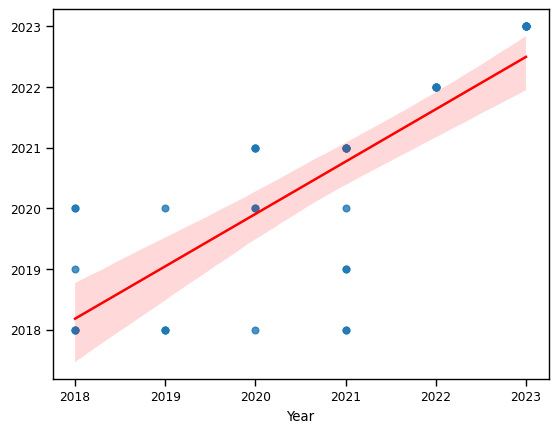

In [31]:
sns.set_context("paper", rc = {"figure.figsize": (20,20)})
sns.regplot(x=year_test,y=predicted_years, line_kws = {"color":"red"})

### Confusion Matrix

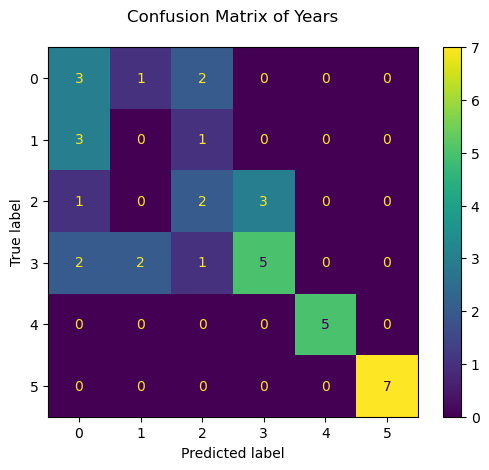

In [12]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

confusion_matrix_year = confusion_matrix(year_test, predicted_years)

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_year)
disp.plot()
plt.title('Confusion Matrix of Years''\n')
plt.show()

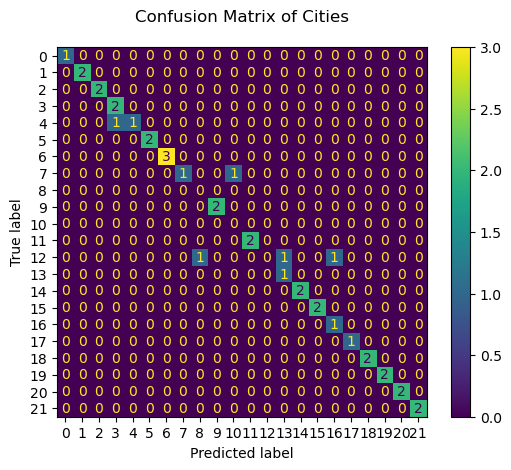

In [13]:
confusion_matrix_city = confusion_matrix(city_test, predicted_cities)

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_city)
disp.plot()
plt.title('Confusion Matrix of Cities''\n')
plt.show()

# corelation coefficient

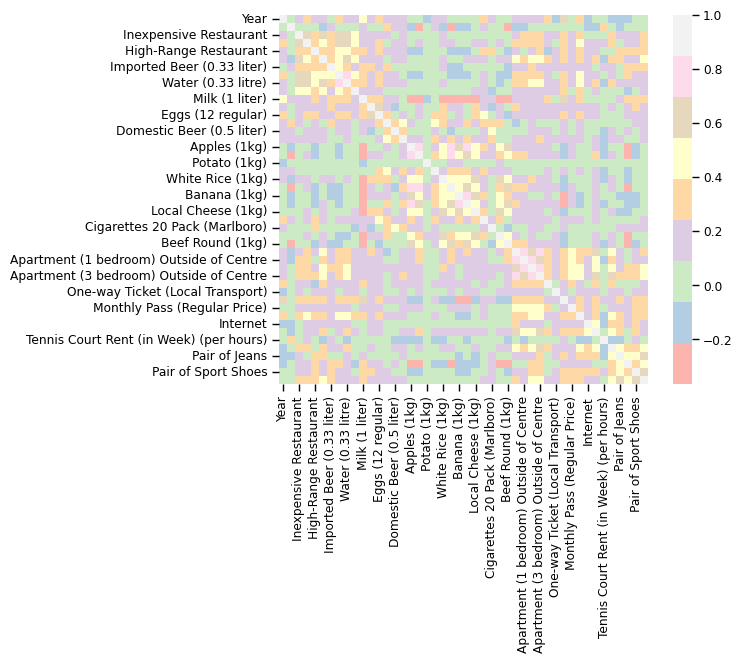

In [19]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

data['City'] = le.fit_transform(data['City'])

corrmat = data.corr()
plt.subplots()
sns.heatmap(corrmat,cmap="Pastel1", square=True);

## outlier detection

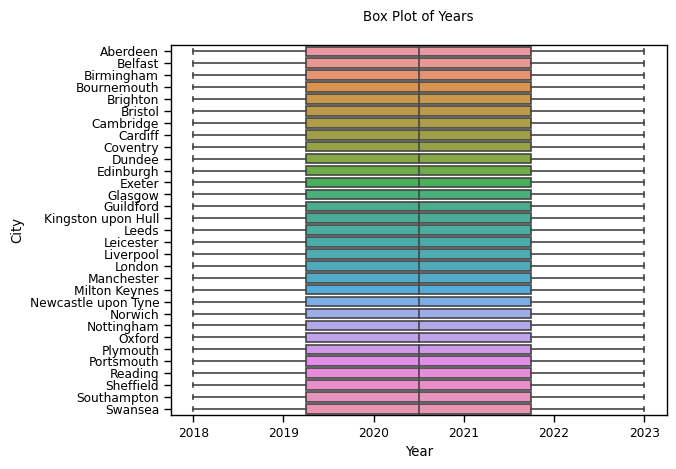

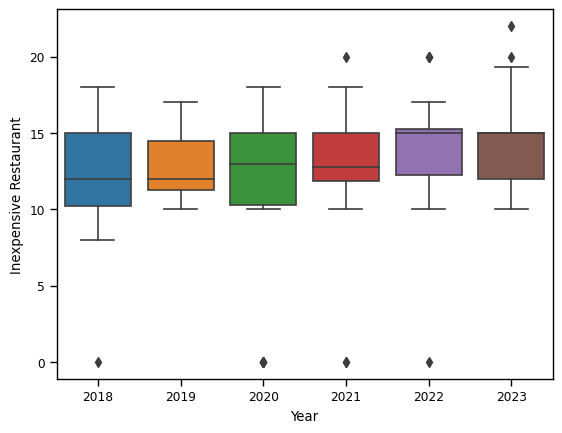

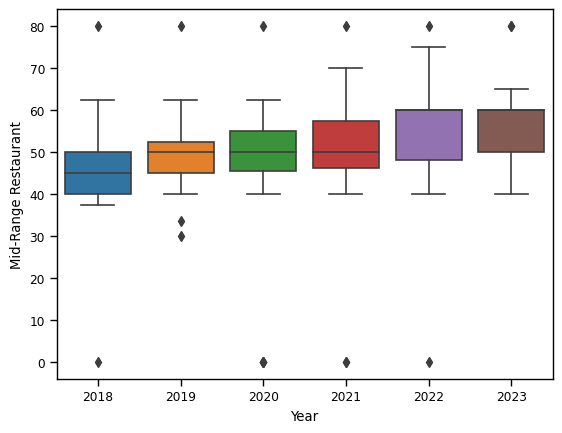

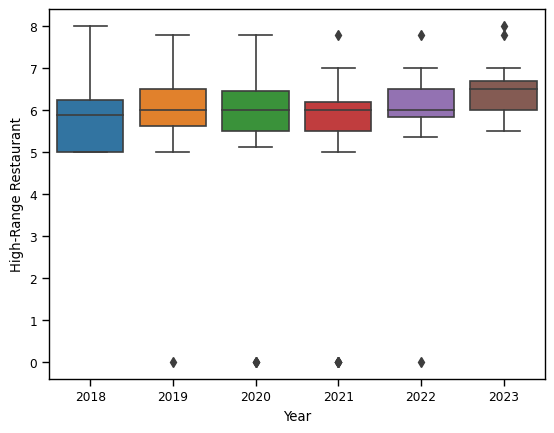

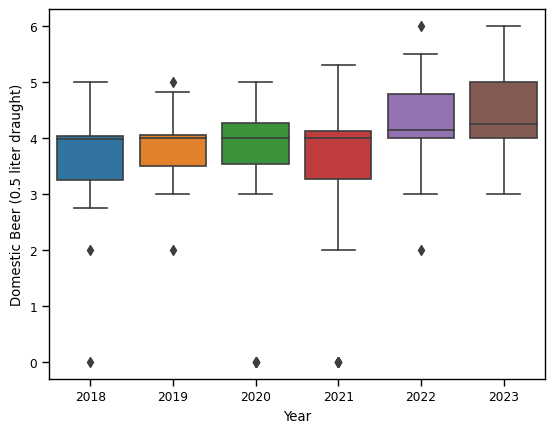

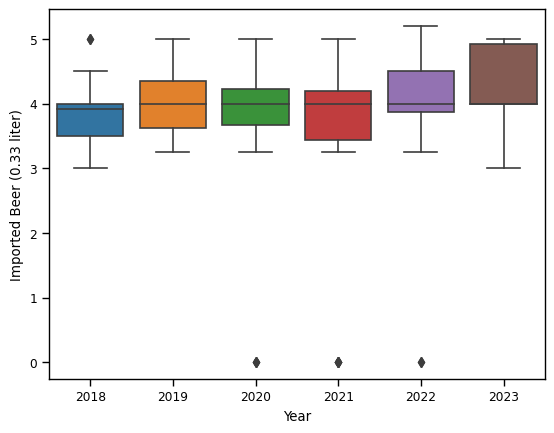

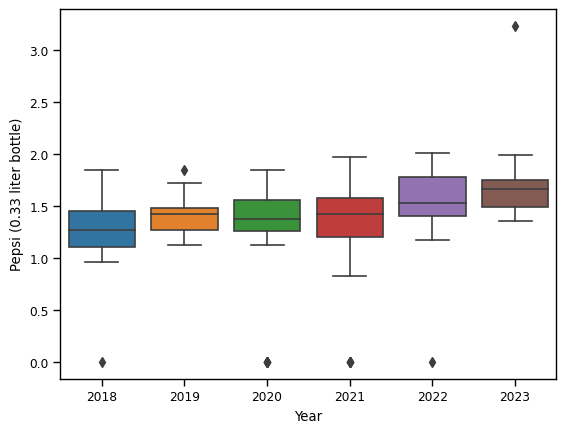

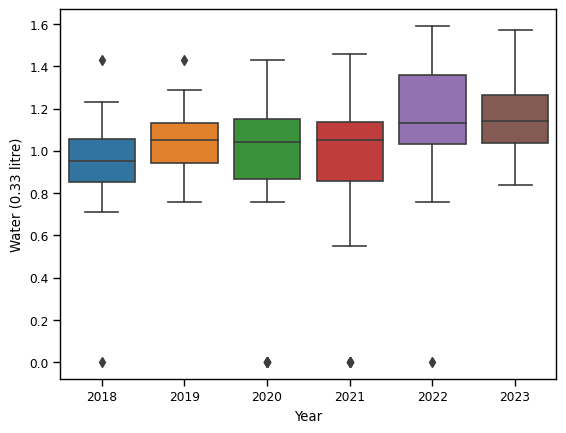

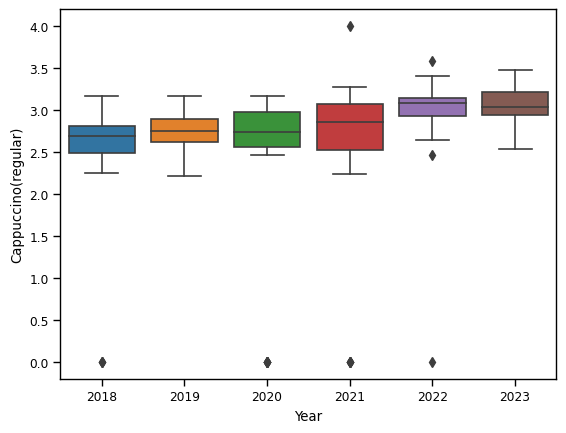

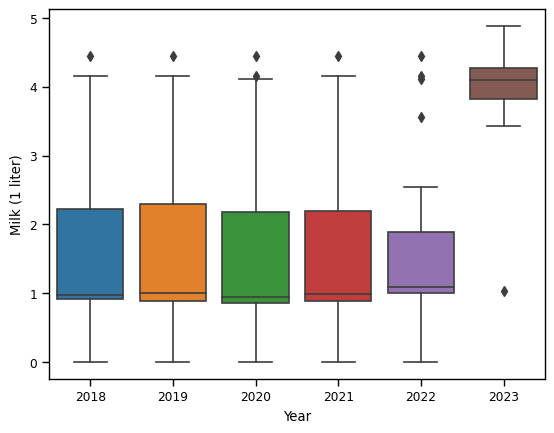

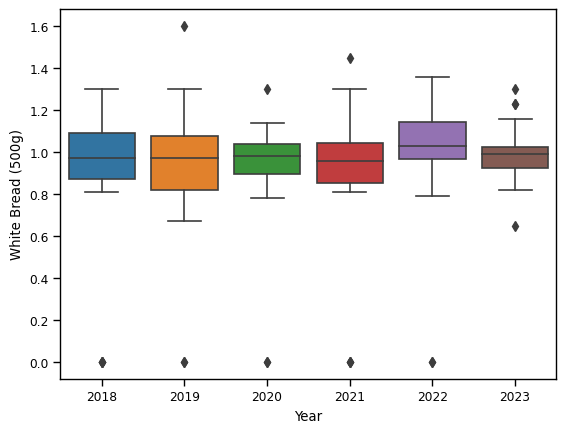

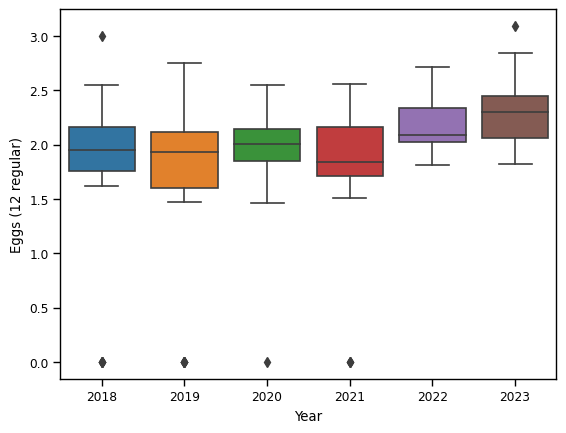

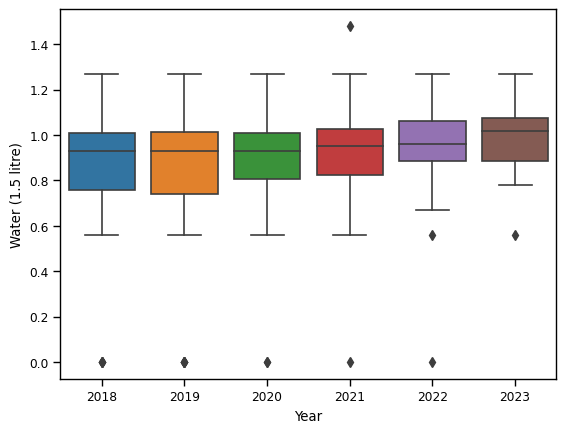

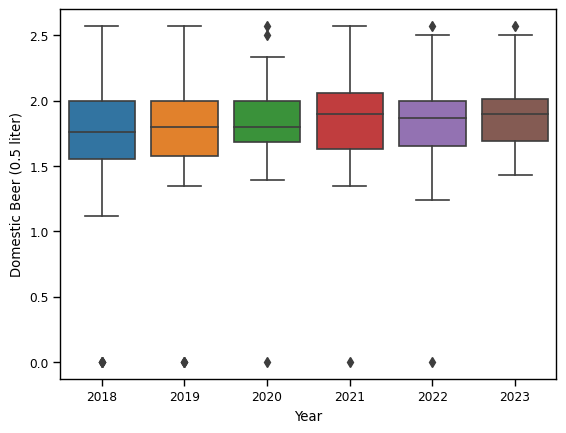

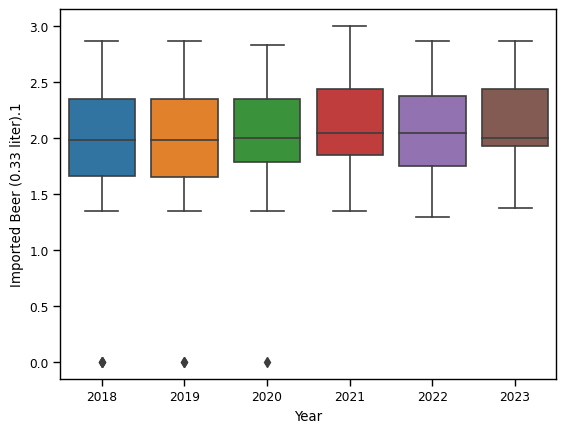

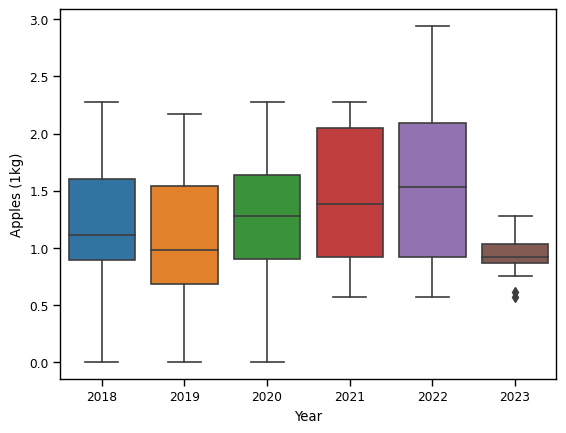

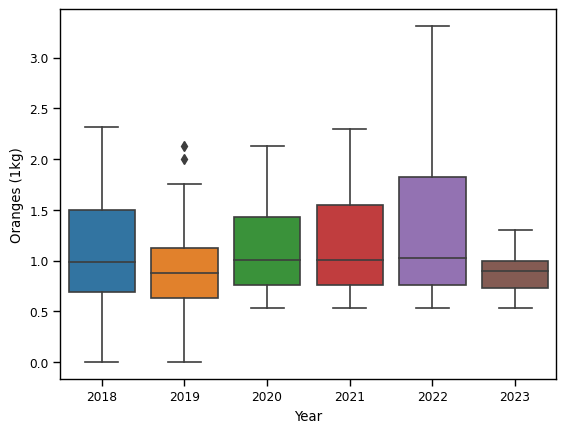

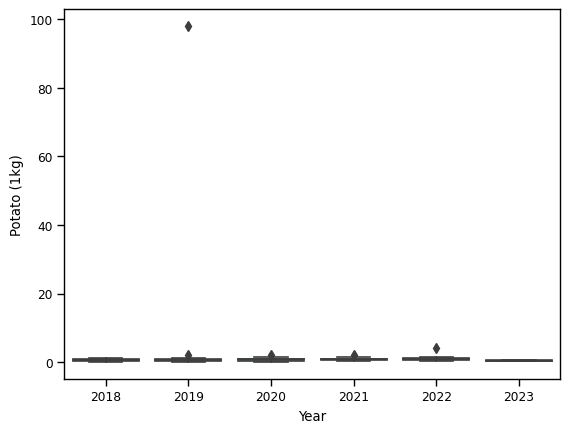

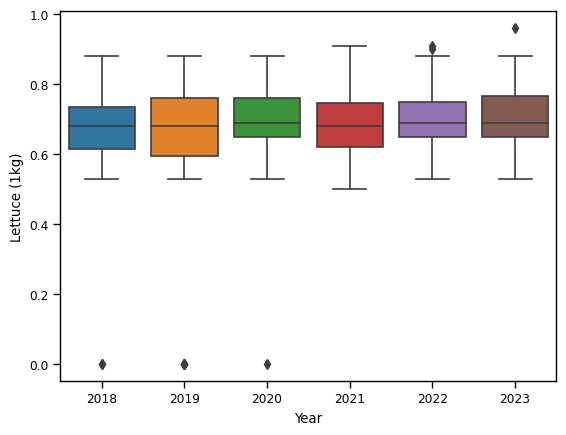

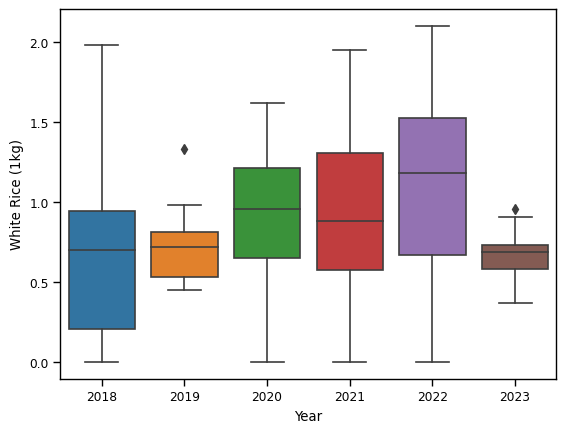

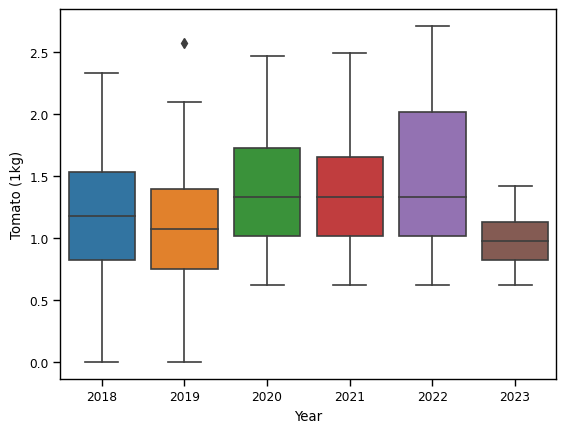

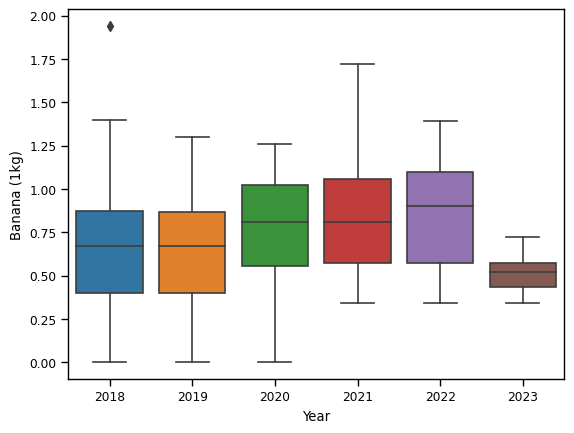

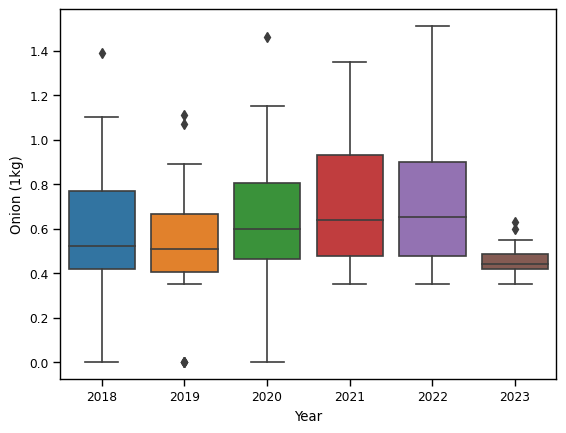

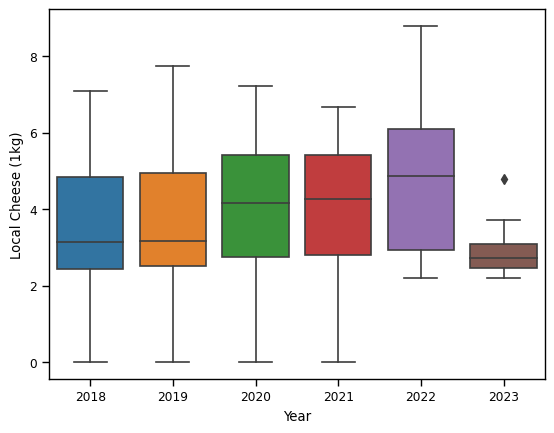

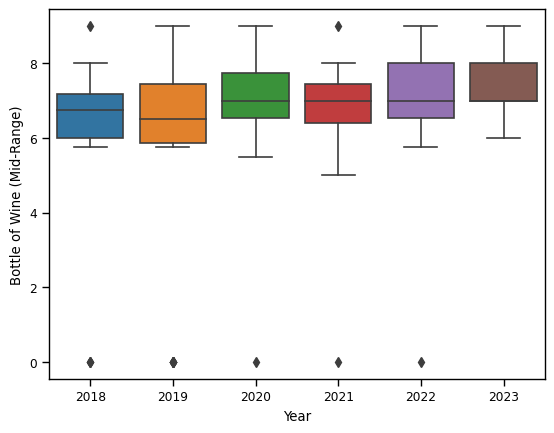

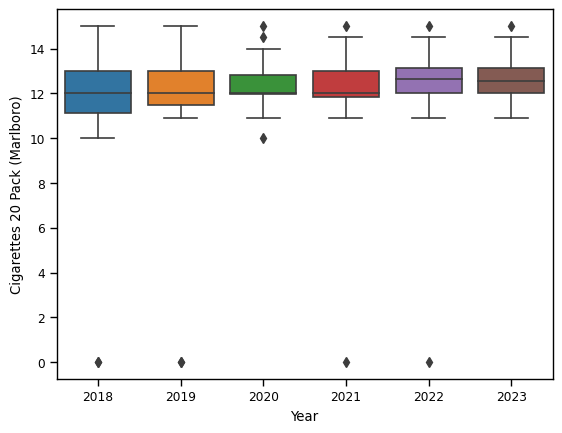

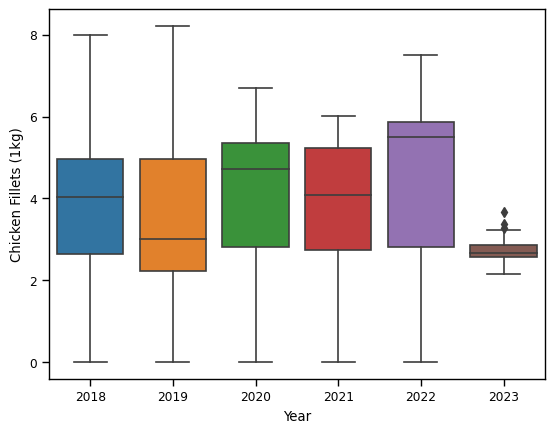

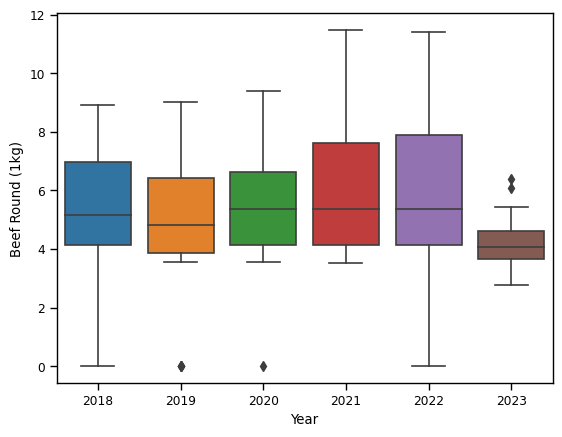

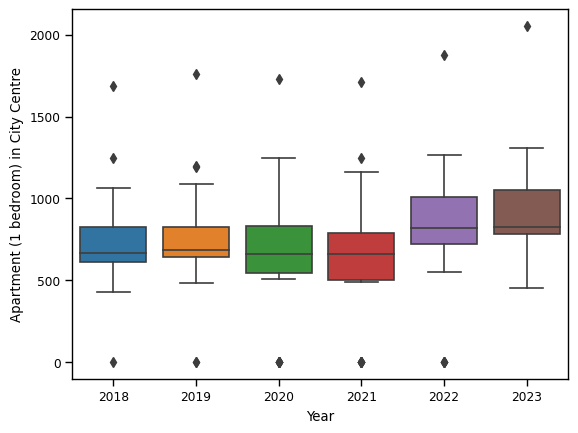

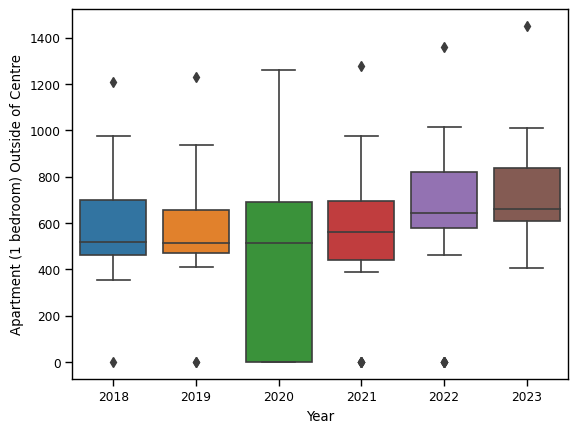

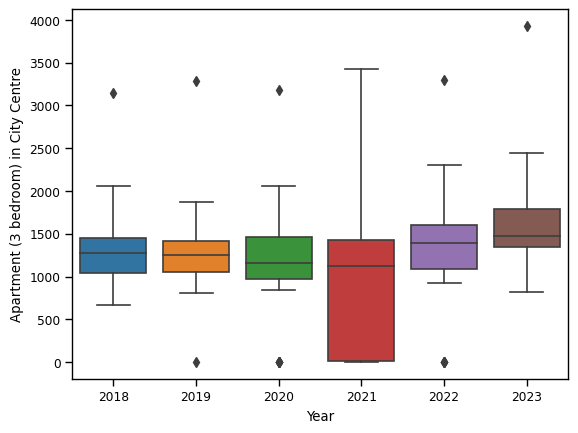

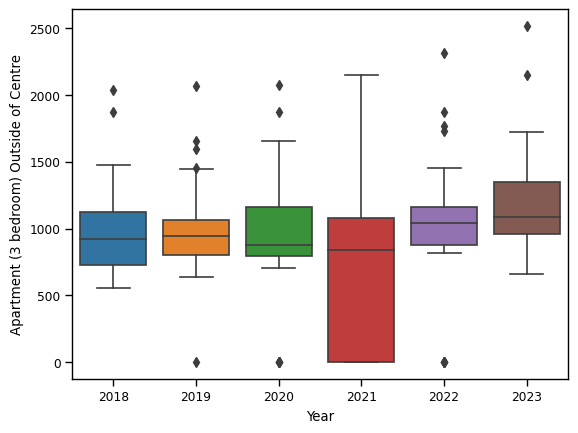

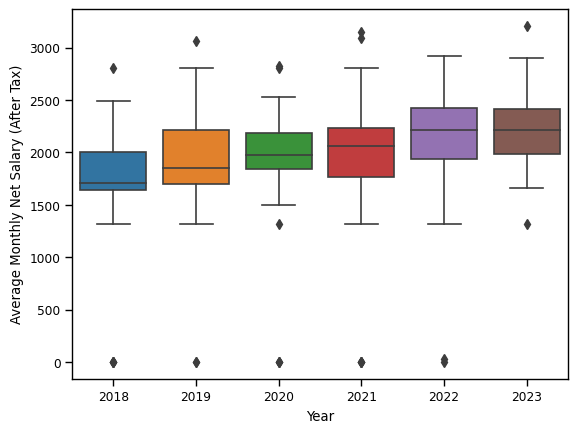

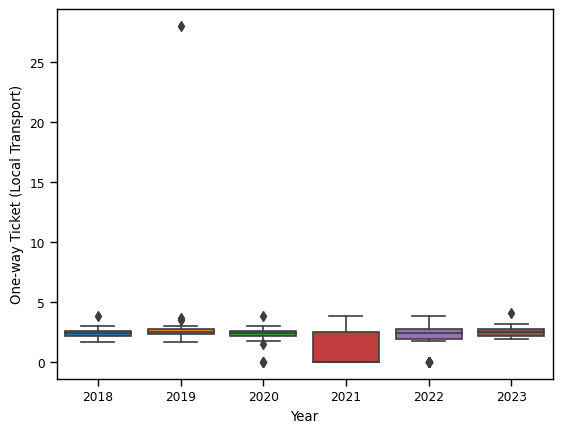

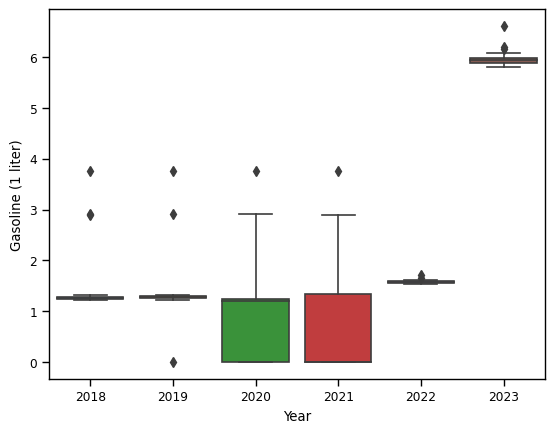

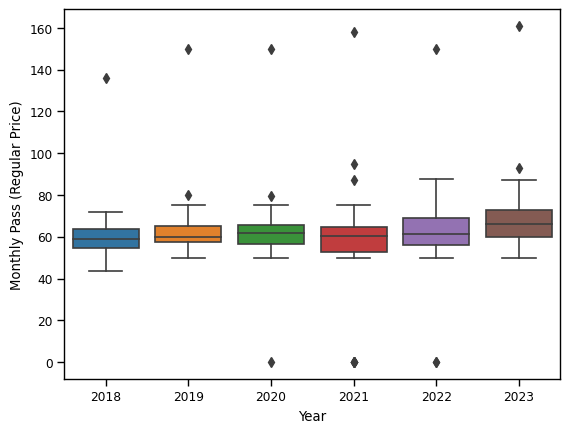

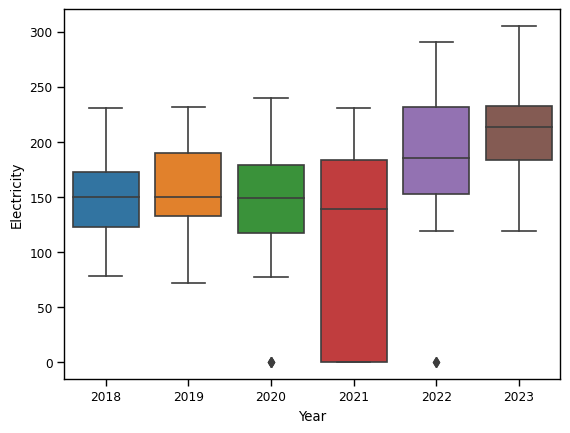

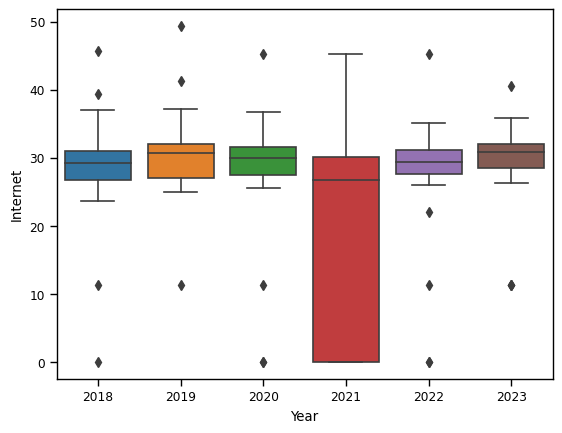

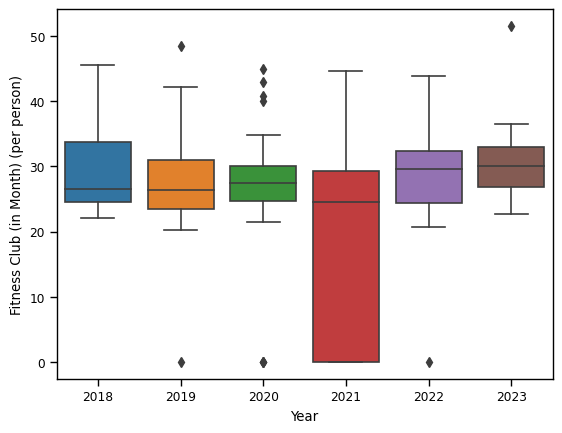

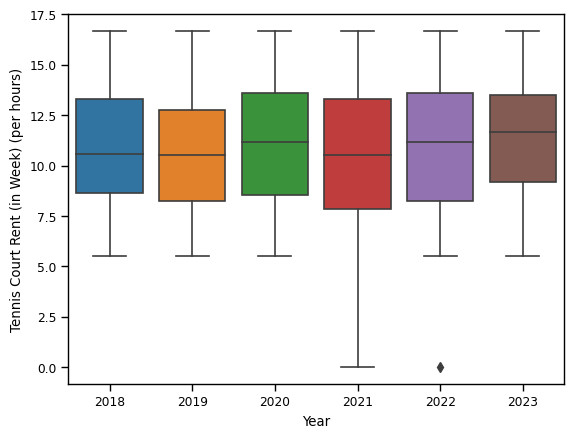

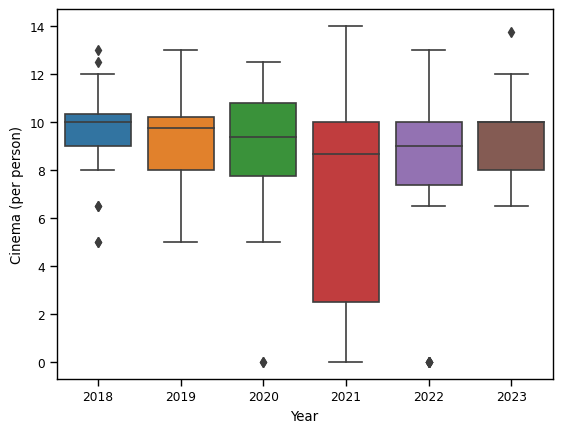

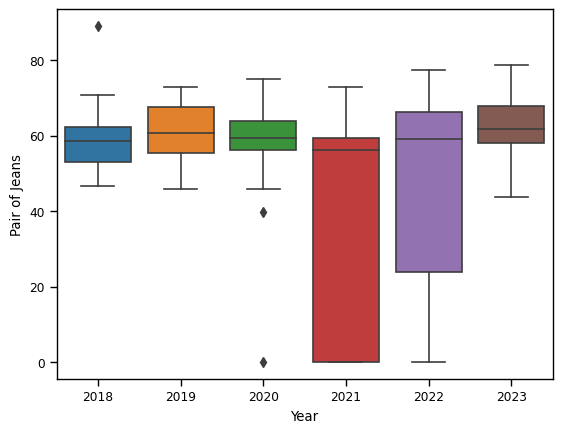

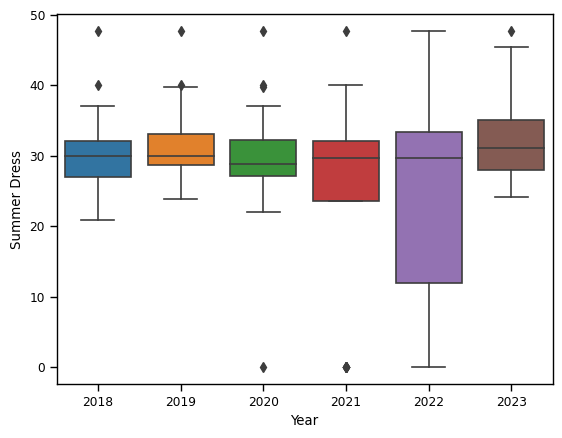

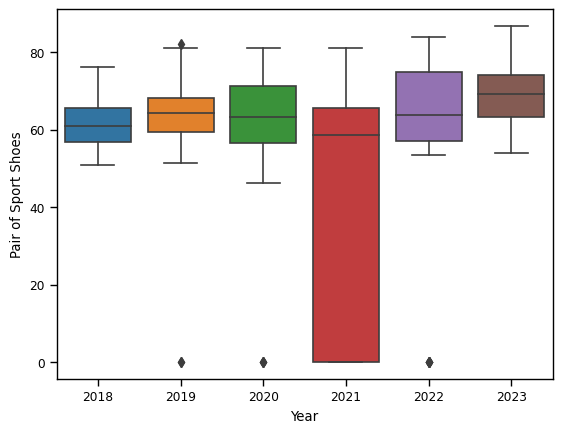

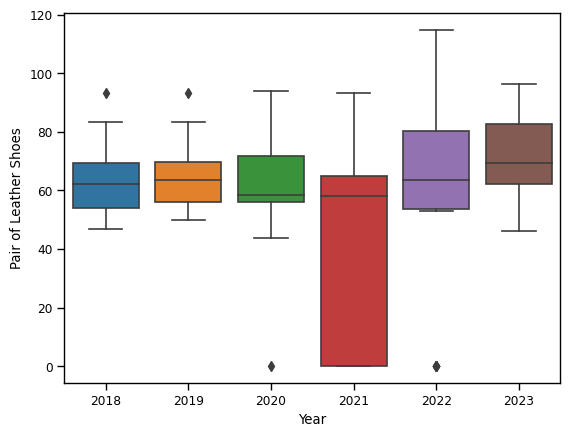

In [46]:
plt.title('Box Plot of Years''\n')

for y in year:
    sns.boxplot(x="Year", y=y, data=data)
    plt.show()

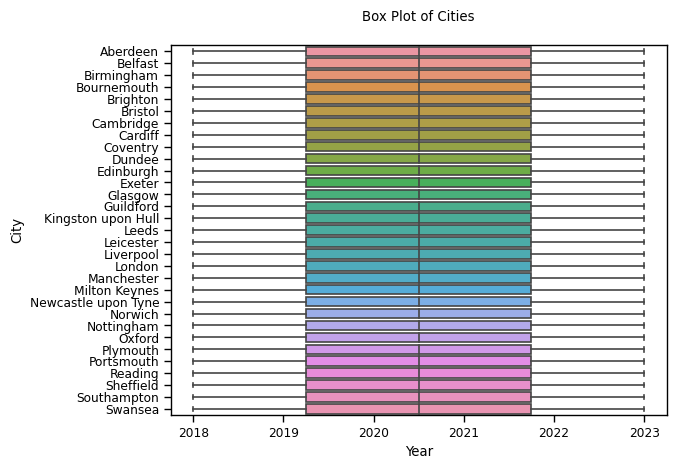

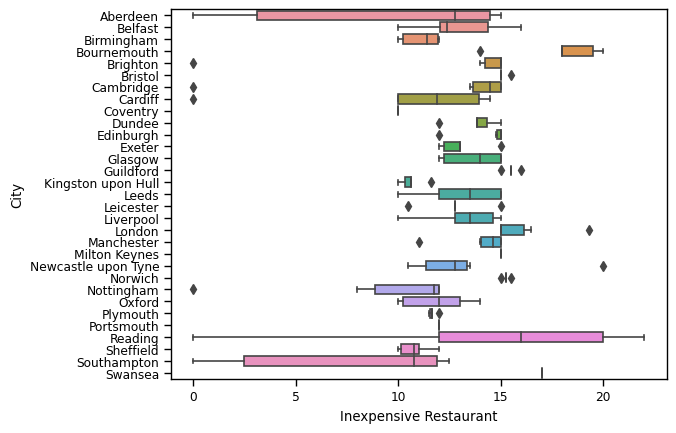

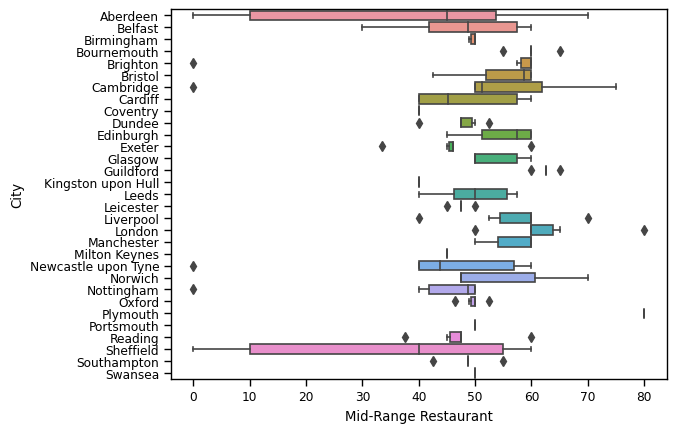

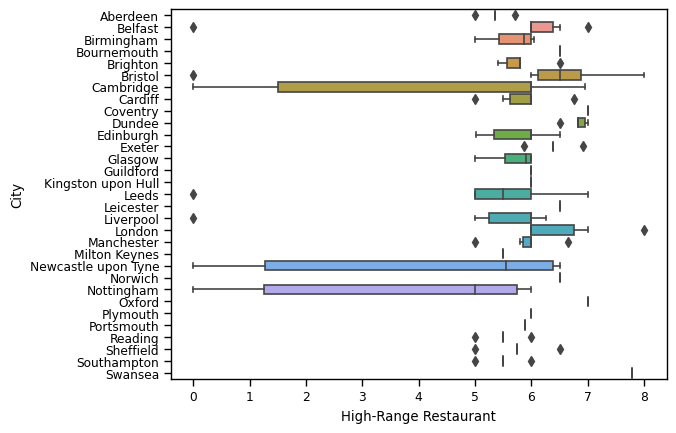

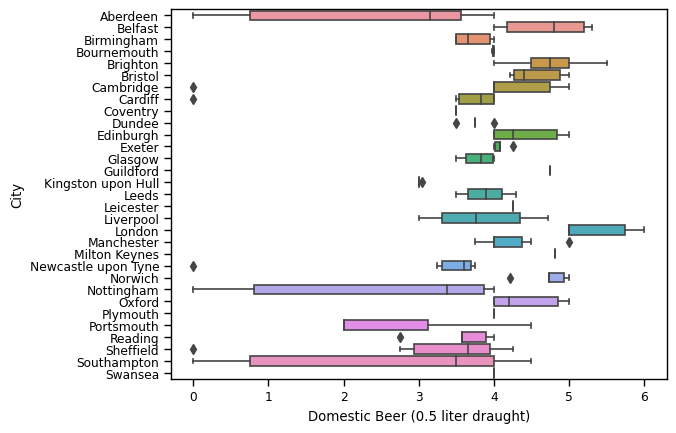

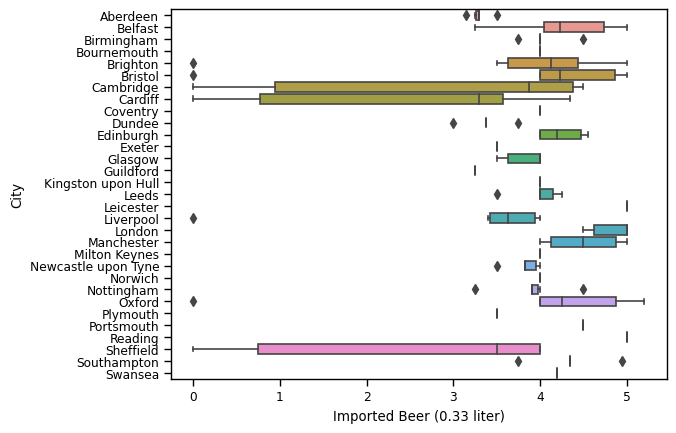

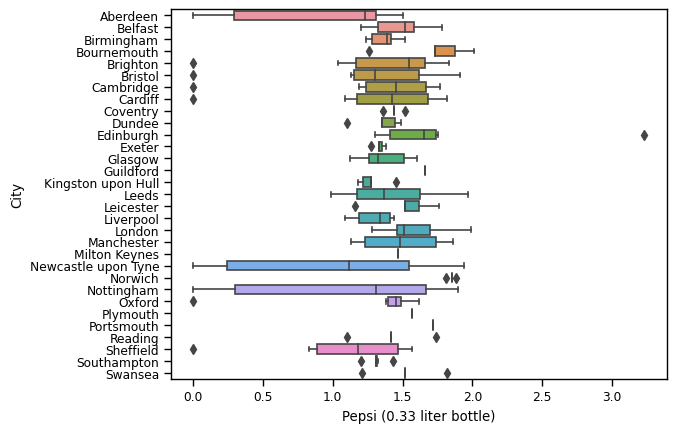

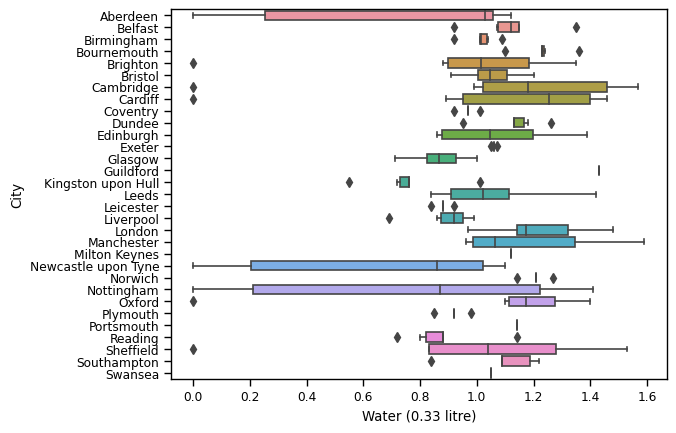

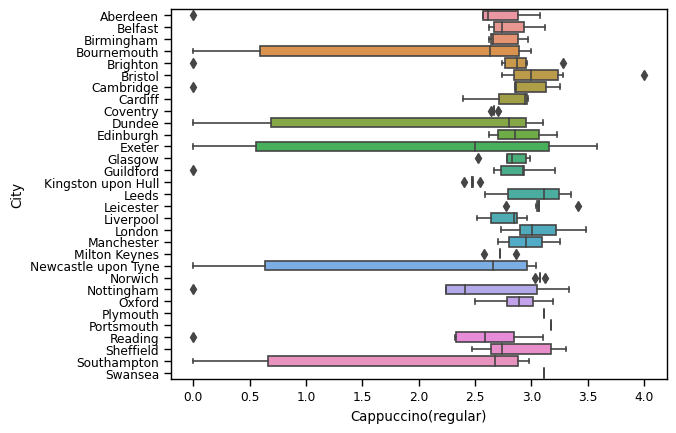

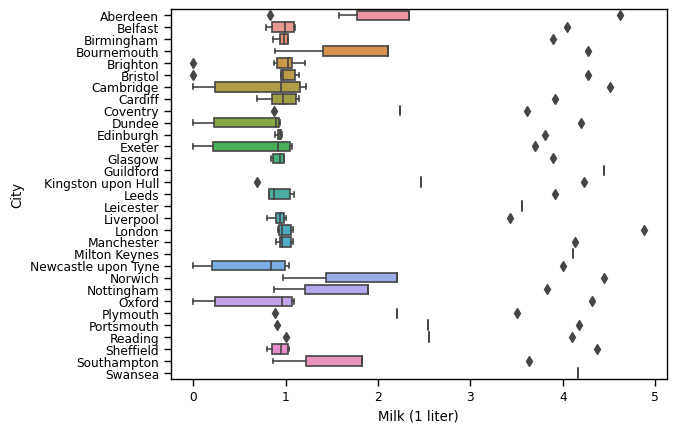

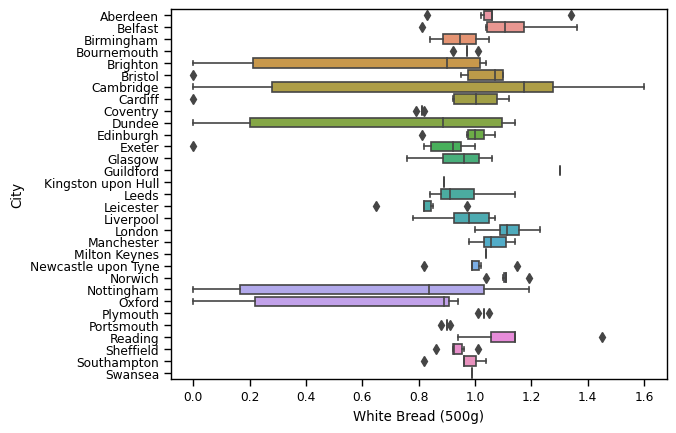

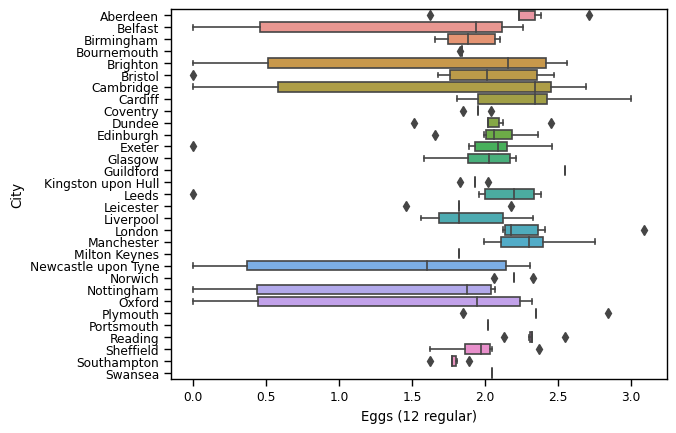

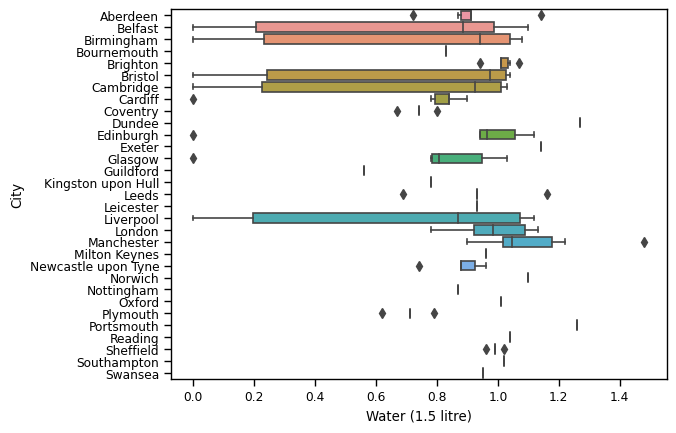

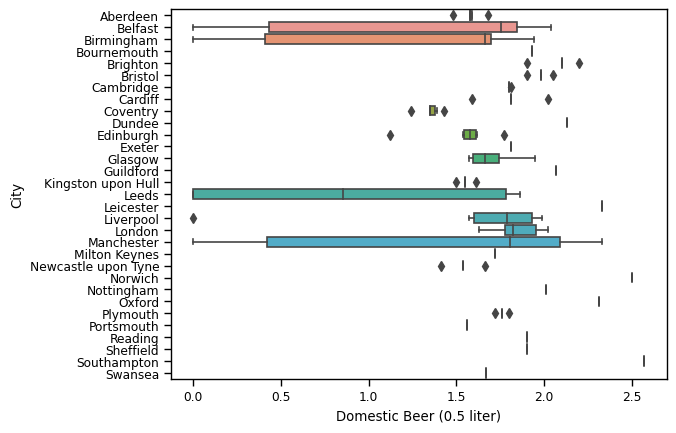

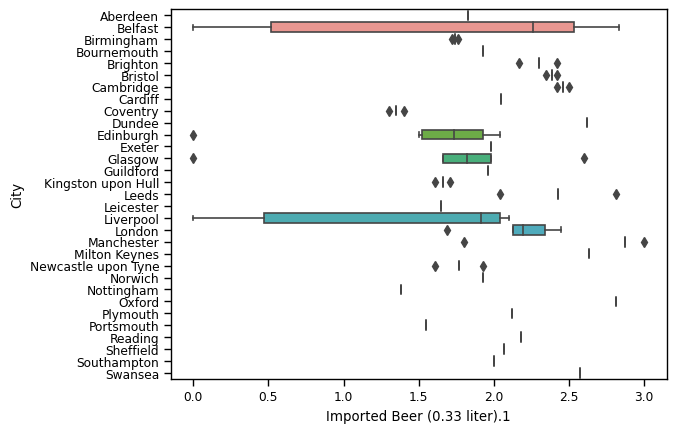

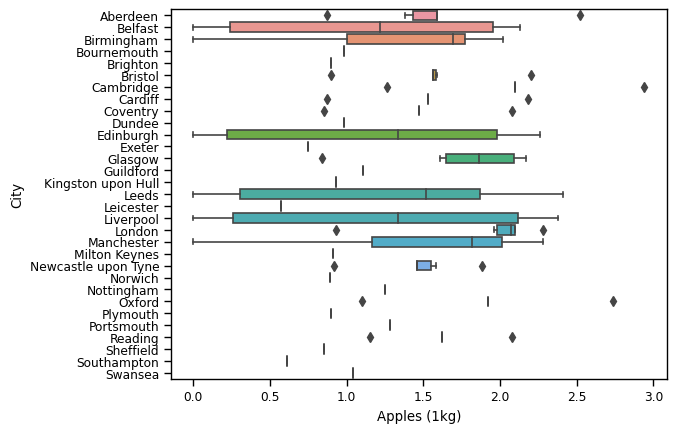

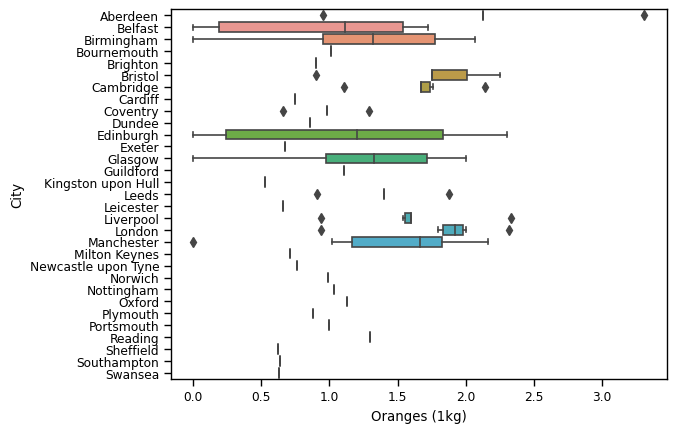

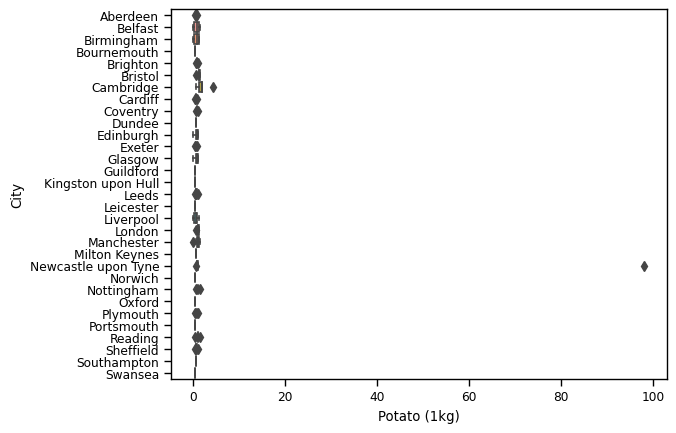

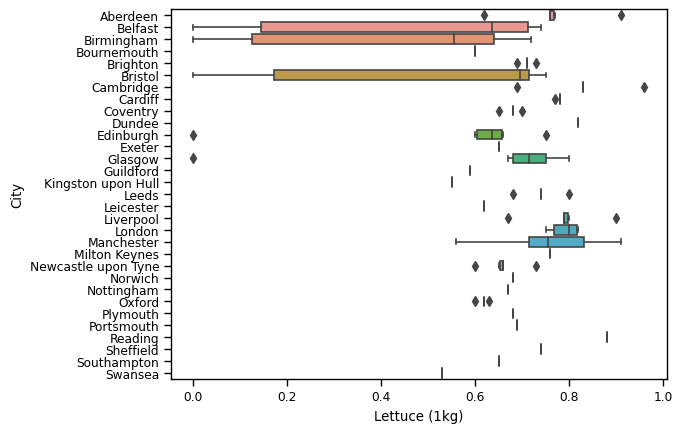

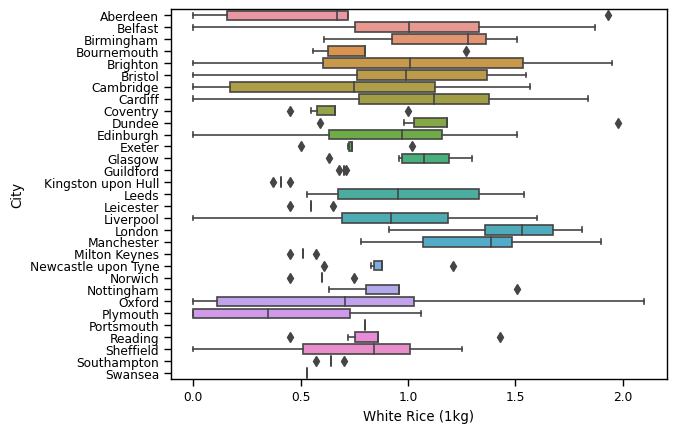

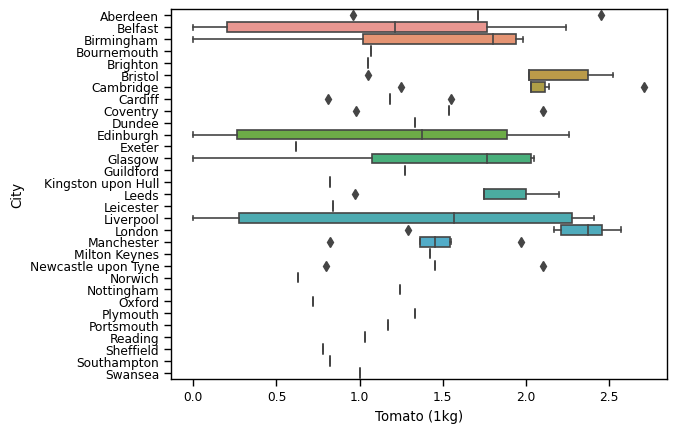

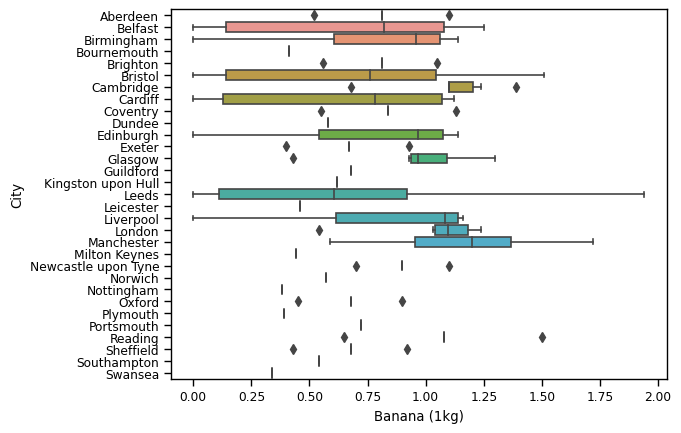

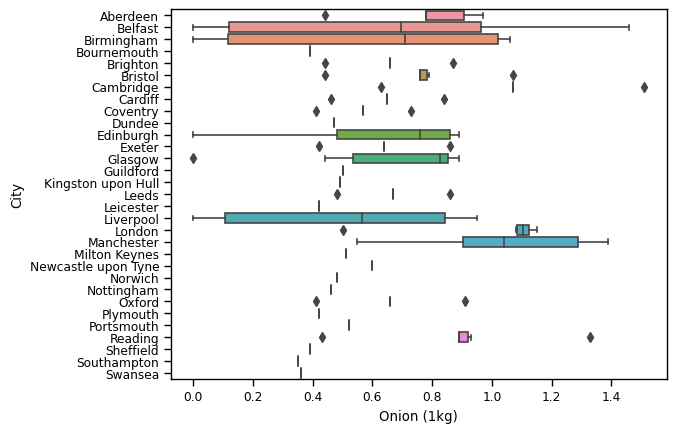

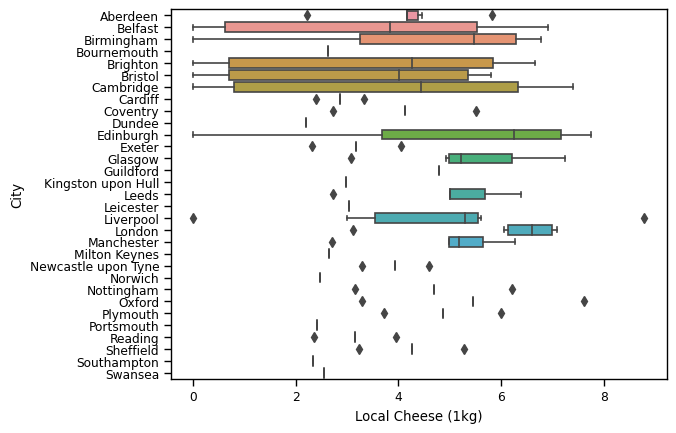

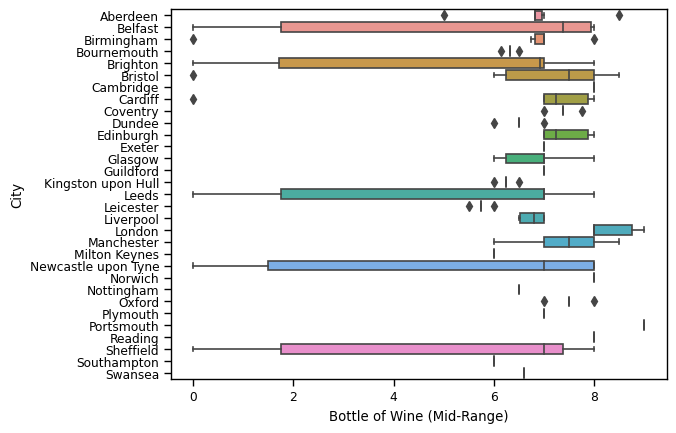

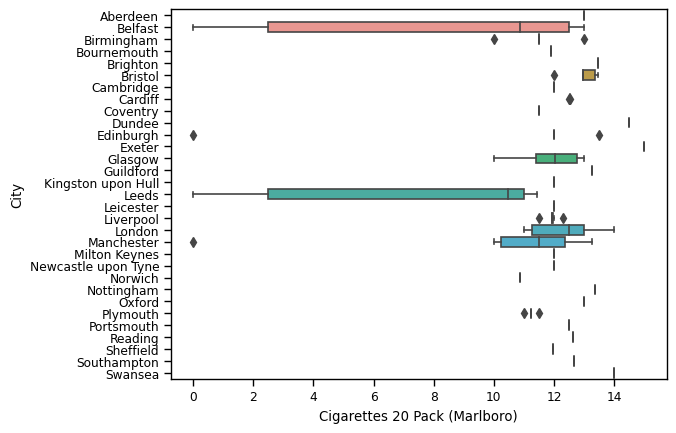

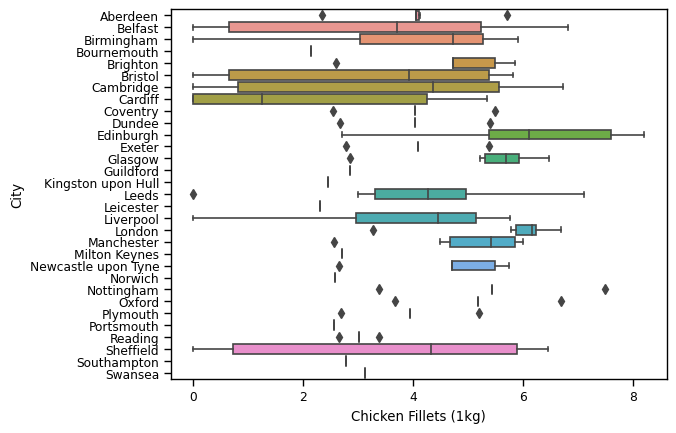

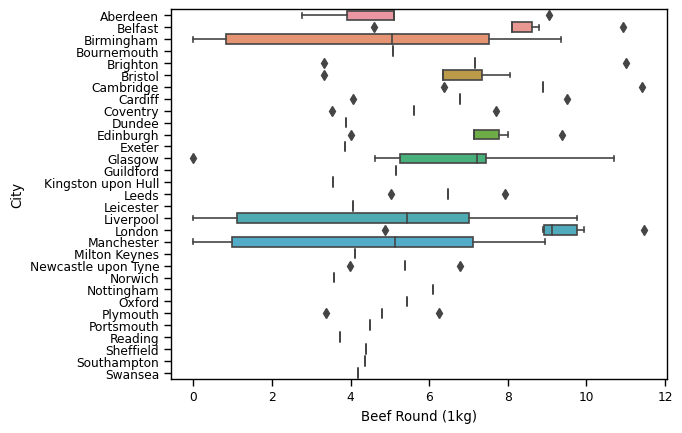

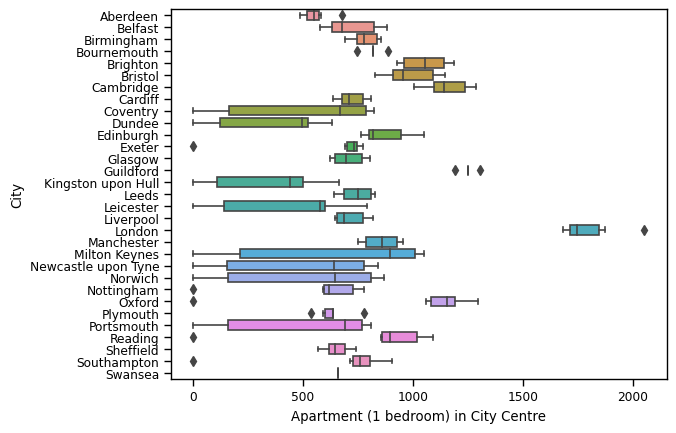

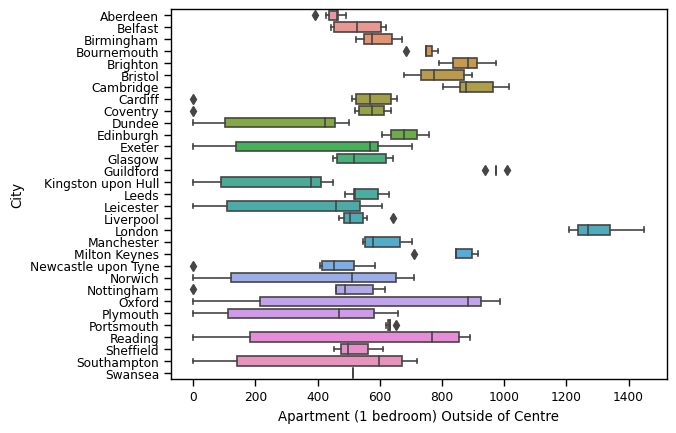

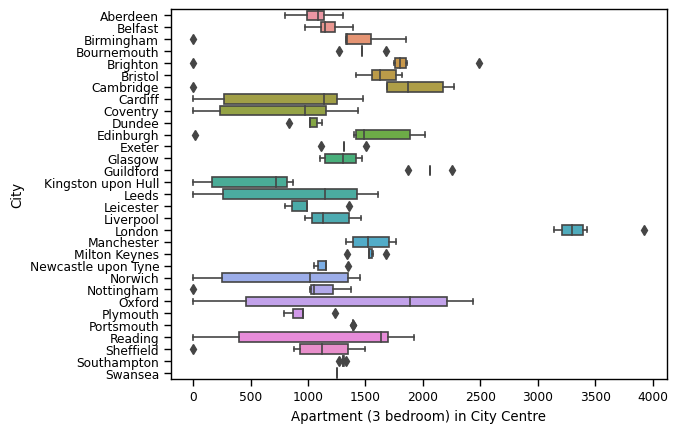

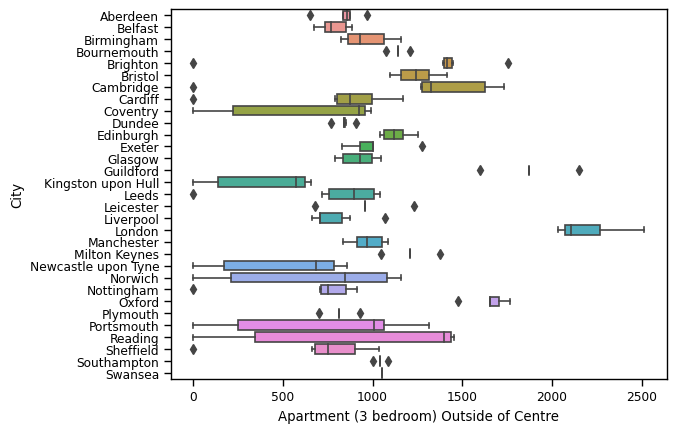

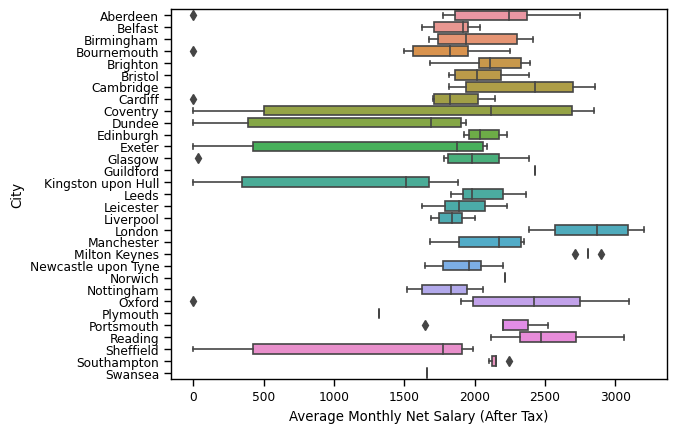

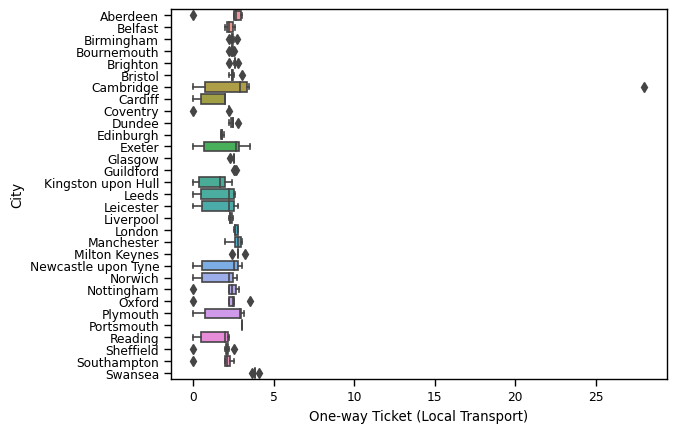

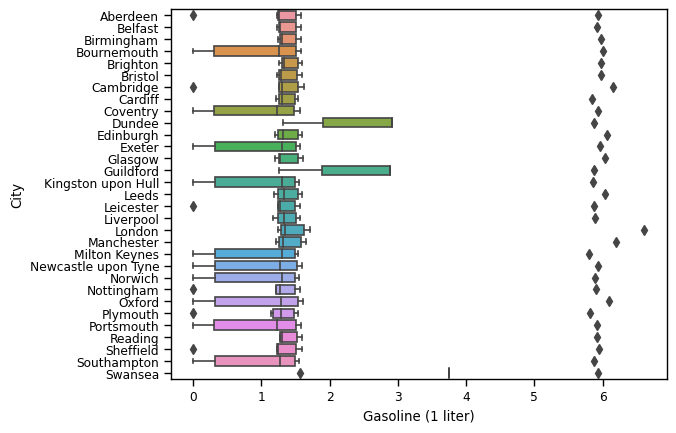

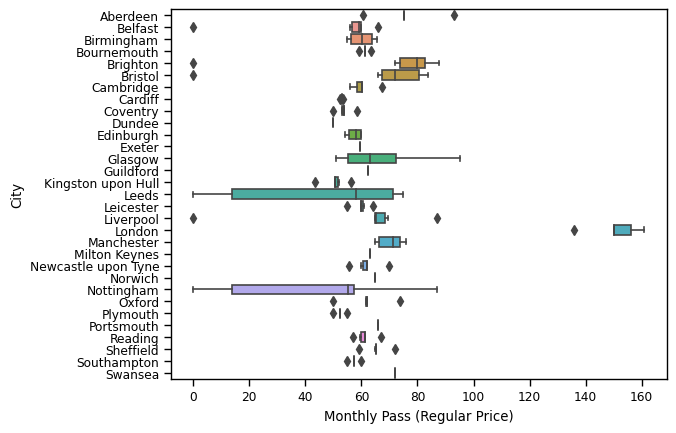

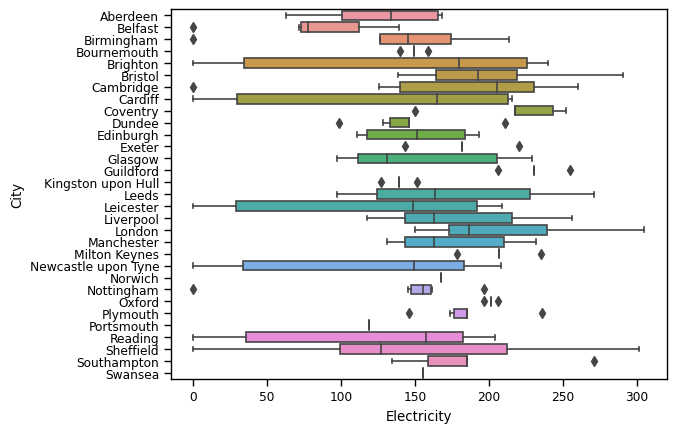

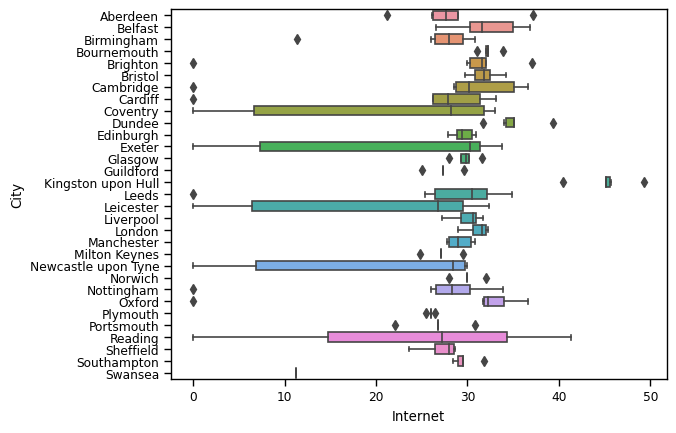

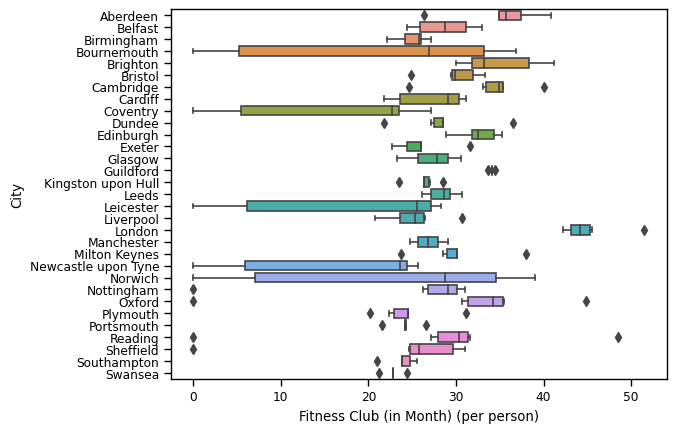

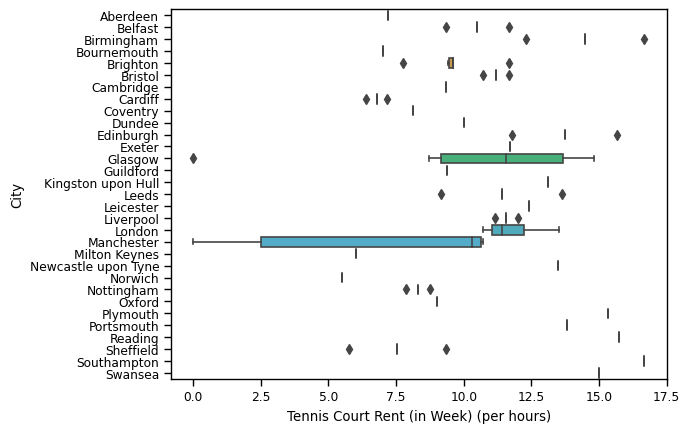

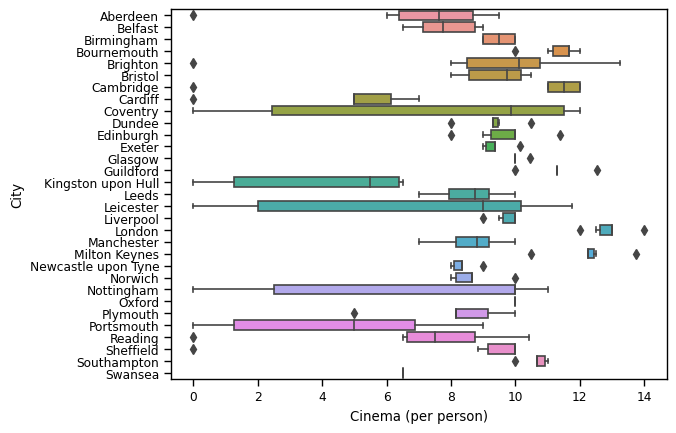

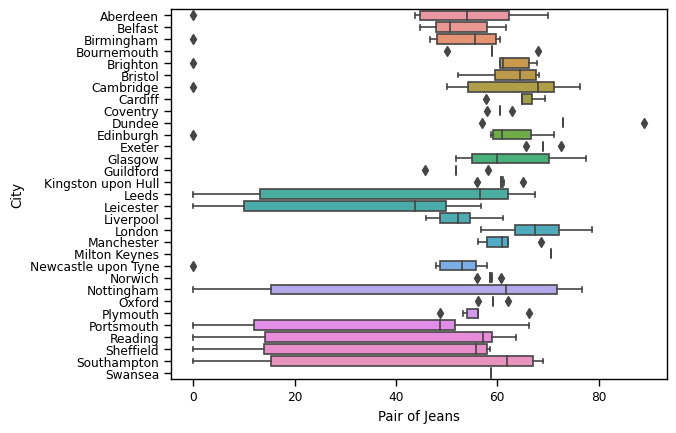

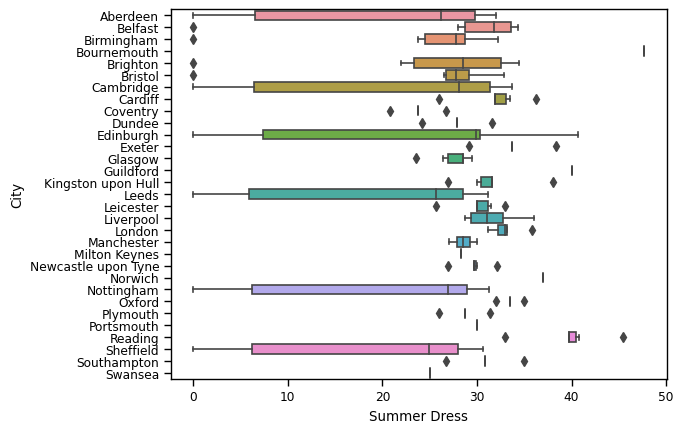

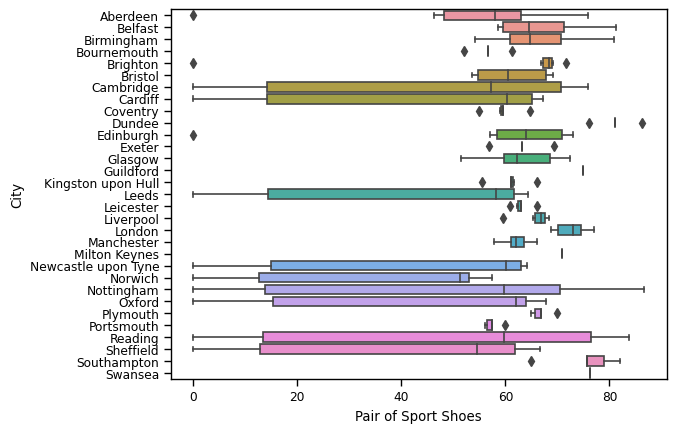

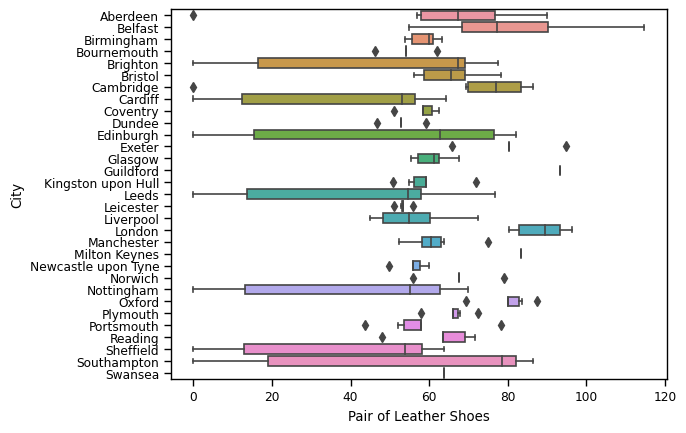

In [48]:
plt.title('Box Plot of Cities''\n')

for y in city:
    sns.boxplot(x=y, y="City", data=data)
    plt.show()